In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
x, y = sp.symbols("x y")

# Define velocity components
u = 2 * y
v = -2 * x

# a) Check incompressibility (∂u/∂x + ∂v/∂y)
du_dx = sp.diff(u, x)
dv_dy = sp.diff(v, y)
divergence = du_dx + dv_dy

print(f"∂u/∂x = {du_dx}")
print(f"∂v/∂y = {dv_dy}")
print(f"Divergence (∂u/∂x + ∂v/∂y) = {divergence} (should be 0 for incompressible)")

∂u/∂x = 0
∂v/∂y = 0
Divergence (∂u/∂x + ∂v/∂y) = 0 (should be 0 for incompressible)


In [6]:
# b) Compute stream function ψ such that:
# u = ∂ψ/∂y and v = -∂ψ/∂x

# Integrate u = ∂ψ/∂y with respect to y
psi_partial_y = sp.integrate(u, y)
print(f"Integrating u = ∂ψ/∂y: ψ = {psi_partial_y} + f(x)")

# Now differentiate this ψ w.r.t x and equate to -v
dpsi_dx = sp.diff(psi_partial_y, x)
# Now, -∂ψ/∂x = v → -dpsi_dx = v
# v = -2x, so:
# -dpsi_dx = -2x
# → dpsi_dx = 2x

# Compute the remaining term f(x)
# Since psi_partial_y has no x term, its derivative is 0
# So, derivative of f(x) must be 2x
f_x = sp.integrate(2 * x, x)
print(f"Integrating ∂f/∂x = 2x: f(x) = {f_x}")

# Final stream function
psi = psi_partial_y + f_x
psi = sp.simplify(psi)

print(f"Final stream function ψ(x, y) = {psi}")

Integrating u = ∂ψ/∂y: ψ = y**2 + f(x)
Integrating ∂f/∂x = 2x: f(x) = x**2
Final stream function ψ(x, y) = x**2 + y**2


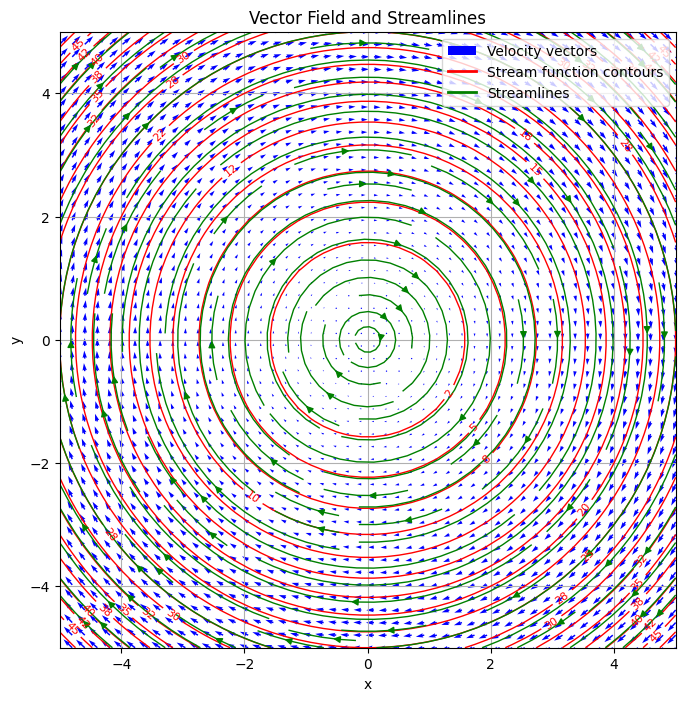

In [7]:
# c) Plot vector field and streamlines numerically

# Convert to numpy functions
u_func = sp.lambdify((x, y), u, "numpy")
v_func = sp.lambdify((x, y), v, "numpy")
psi_func = sp.lambdify((x, y), psi, "numpy")

# Create grid
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute velocity components
U = u_func(X, Y)
V = v_func(X, Y)

# Compute stream function values
PSI = psi_func(X, Y)

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Vector field
qv = ax.quiver(X, Y, U, V, color="blue", label="Velocity vectors")

# Stream function contours
contours = ax.contour(
    X, Y, PSI, levels=20, colors="red", linewidths=1, linestyles="solid"
)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
contour_proxy = plt.Line2D(
    [0], [0], color="red", lw=2, label="Stream function contours"
)

# Streamplot for smooth streamlines
strm = ax.streamplot(X, Y, U, V, color="green", linewidth=1, density=1.2)
stream_proxy = plt.Line2D([0], [0], color="green", lw=2, label="Streamlines")

# Plot settings
ax.set_title("Vector Field and Streamlines")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect("equal")
ax.grid(True)

# Legend
ax.legend(handles=[qv, contour_proxy, stream_proxy], loc="upper right")

plt.show()

# 📖 Exercise 6.2 — Streamlines

## Given:
The two-dimensional velocity field:

\[
\vec{u} = 2y\, \hat{i} - 2x\, \hat{j}
\]

---

## a) What condition must be met for a stream function to exist?

A **stream function** exists for a **two-dimensional incompressible flow** if the **continuity equation** is satisfied:

\[
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0
\]

**Check for this velocity field:**

\[
\frac{\partial (2y)}{\partial x} + \frac{\partial (-2x)}{\partial y} = 0 + 0 = 0
\]

✅ The continuity equation is satisfied → a stream function exists.

---

## b) Determine the stream function

For a 2D flow:

\[
u = \frac{\partial \psi}{\partial y}, \quad v = -\frac{\partial \psi}{\partial x}
\]

Given:

\[
u = 2y, \quad v = -2x
\]

**Integrate each component:**

From \( u = \frac{\partial \psi}{\partial y} \):

\[
\psi(x, y) = \int 2y\, dy = y^2 + f(x)
\]

From \( v = -\frac{\partial \psi}{\partial x} \):

\[
\frac{\partial \psi}{\partial x} = 2x
\]
\[
\psi(x, y) = \int 2x\, dx = x^2 + g(y)
\]

**Combine both:**

\[
\psi(x, y) = x^2 + y^2 + C
\]

Where \(C\) is an arbitrary constant.

---

## ✅ Final Answers:

**a)** A stream function exists if:

\[
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0
\]

**b)** The stream function is:

\[
\psi(x, y) = x^2 + y^2 + C
\]

---

## 📎 Did you know?

For 2D incompressible flow:
- **Streamlines** are the contour lines of the stream function.
- In this case, streamlines are circles centered at the origin, since:

\[
x^2 + y^2 = \text{constant}
\]

---

Would you like a quick Python plot to visualize those streamlines? 📊✨
